## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings

In [2]:
data = pd.read_csv('notebook\data\stud.csv')
data.gender.unique()

array(['female', 'male'], dtype=object)

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('notebook\data\stud.csv')

#### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
categorical_data = [i for i in df.columns if df[i].dtype=="object"]
categorical_data

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [7]:
numerical_data = [i for i in df.columns if df[i].dtype!="object"]
numerical_data

['math_score', 'reading_score', 'writing_score']

In [8]:
df.isnull().count()

gender                         1000
race_ethnicity                 1000
parental_level_of_education    1000
lunch                          1000
test_preparation_course        1000
math_score                     1000
reading_score                  1000
writing_score                  1000
dtype: int64

In [9]:
discrete_numerical_data = [i for i in numerical_data if len(df[i].unique())<16]
discrete_numerical_data

[]

In [10]:
continuous_numerical_data = [i for i in numerical_data if len(df[i].unique())>=16]
continuous_numerical_data

['math_score', 'reading_score', 'writing_score']

In [11]:
# We will encode the categorical data using label Encoder.
le = preprocessing.LabelEncoder()

for i in categorical_data:
    df[i] = le.fit_transform(df[i])

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [13]:
# Log Transformation
for i in ["reading_score", "writing_score"]:
    df[i] = np.log(df[i])

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,4.276666,4.304065
1,0,2,4,1,0,69,4.499810,4.477337
2,0,1,3,1,1,90,4.553877,4.532599
3,1,0,0,0,1,47,4.043051,3.784190
4,1,2,4,1,1,76,4.356709,4.317488


In [15]:
# Correlation Matrix
df.corr()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,0.167982,-0.226513,-0.271021
race_ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.216415,0.143497,0.161450
parental_level_of_education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.068279,-0.077167,-0.089715
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.350877,0.231568,0.245325
test_preparation_course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.177702,-0.232599,-0.296548
math_score,0.167982,0.216415,-0.068279,0.350877,-0.177702,1.000000,0.807993,0.791786
reading_score,-0.226513,0.143497,-0.077167,0.231568,-0.232599,0.807993,1.000000,0.955257
writing_score,-0.271021,0.161450,-0.089715,0.245325,-0.296548,0.791786,0.955257,1.000000


<Axes: >

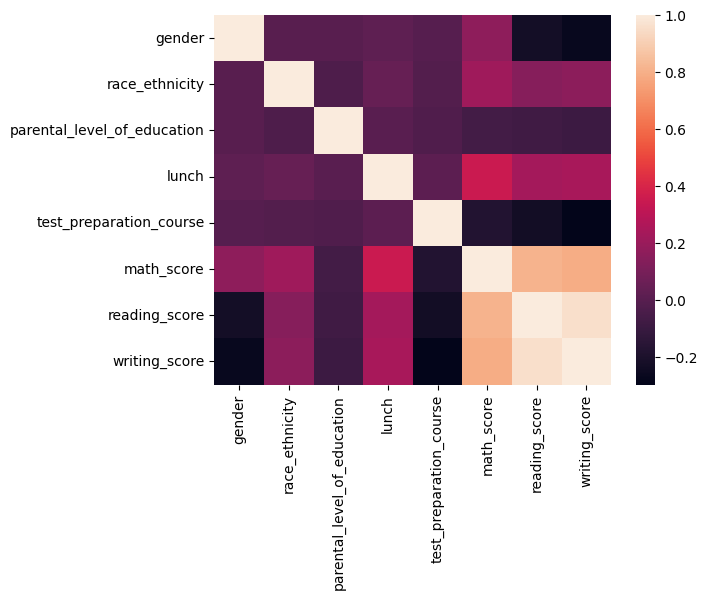

In [16]:
sns.heatmap(df.corr())

#### Preparing X and Y variables

In [17]:
X,y = df.drop(columns = "math_score"),df["math_score"]

In [18]:
X = df.drop(columns=['math_score'],axis=1)

In [19]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,0,1,1,1,1,4.276666,4.304065
1,0,2,4,1,0,4.499810,4.477337
2,0,1,3,1,1,4.553877,4.532599
3,1,0,0,0,1,4.043051,3.784190
4,1,2,4,1,1,4.356709,4.317488


In [20]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [21]:
y = df['math_score']

In [22]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [23]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((700, 7), (300, 7))

In [24]:
X_train

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
541,1,3,0,0,0,4.406719,4.382027
440,0,2,4,1,0,4.394449,4.369448
482,1,2,4,0,1,4.219508,4.110874
422,0,3,3,0,0,4.060443,4.204693
778,0,0,4,1,0,4.369448,4.406719
...,...,...,...,...,...,...,...
106,0,3,3,1,1,4.605170,4.605170
270,1,2,1,1,1,4.143135,4.110874
860,0,2,0,1,1,4.127134,3.970292
435,1,2,4,0,0,3.871201,3.970292


#### Create an Evaluate Function to give all metrics after model Training

In [25]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print()
    print('----------------------------------')
    print()
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.9601
- Mean Absolute Error: 4.7482
- R2 Score: 0.8390

----------------------------------

Model performance for Test set
- Root Mean Squared Error: 7.3107
- Mean Absolute Error: 5.2045
- R2 Score: 0.7852


Lasso
Model performance for Training set
- Root Mean Squared Error: 8.2503
- Mean Absolute Error: 6.5981
- R2 Score: 0.6914

----------------------------------

Model performance for Test set
- Root Mean Squared Error: 8.2991
- Mean Absolute Error: 6.7542
- R2 Score: 0.7232


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.9669
- Mean Absolute Error: 4.7558
- R2 Score: 0.8386

----------------------------------

Model performance for Test set
- Root Mean Squared Error: 7.1791
- Mean Absolute Error: 5.1739
- R2 Score: 0.7929


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 8.4398
- Mean Absolute Error: 6.6166
- R2 Score: 0.6771

----------------

### Results

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.844068
7,AdaBoost Regressor,0.828838
6,XGBRegressor,0.809923
2,Ridge,0.792855
0,Linear Regression,0.785194
4,Decision Tree,0.736024
1,Lasso,0.723183
3,K-Neighbors Regressor,0.471650


## Random Forest Regressor

In [28]:
# Import the RandomForestRegressor class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor with default hyperparameters
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Calculate R-squared score
score_rf = r2_score(y_test, y_pred_rf) * 100

print("Accuracy of the Random Forest model is %.2f" % score_rf)


Accuracy of the Random Forest model is 84.44


In [29]:
print("Accuracy of Random Forest Regressor Model is ",rf_model.score(X_test,y_test)*100)

Accuracy of Random Forest Regressor Model is  84.43922888283235


In [30]:
score = cross_val_score(rf_model, X, y, cv=5)
print("Cross validation is",np.mean(score)*100)

Cross validation is 83.62571898492392


In [31]:
# Create a dictionary with values for each feature
new_data = {
    'gender': 1,  # Example: 1 for male, 0 for female
    'race_ethnicity': 2,  # Example: 0 for group A, 1 for group B, and so on
    'parental_level_of_education': 3,  # Example: 0 for bachelor's degree, 1 for some college, and so on
    'lunch': 1,  # Example: 1 for standard, 0 for free/reduced
    'test_preparation_course': 0,  # Example: 1 for completed, 0 for none
    'reading_score': 85,  # Example: 85
    'writing_score': 90  # Example: 90
}

# Convert the dictionary to a DataFrame
new_df = pd.DataFrame([new_data])

# Make prediction using the trained Random Forest model
predicted_math_score = rf_model.predict(new_df)

print("Predicted math score:", predicted_math_score[0])


Predicted math score: 94.04309523809523


In [32]:
# Create a dictionary to store user input
new_data = {}

# Prompt the user for input for each feature
new_data['gender'] = input("Enter gender (male/female): ").lower()
new_data['race_ethnicity'] = input("Enter race/ethnicity (group A/B/C/D/E): ").lower()
new_data['parental_level_of_education'] = input("Enter parental level of education: ").lower()
new_data['lunch'] = input("Enter type of lunch (standard/free/reduced): ").lower()
new_data['test_preparation_course'] = input("Enter test preparation course (none/completed): ").lower()
new_data['reading_score'] = float(input("Enter reading score: "))
new_data['writing_score'] = float(input("Enter writing score: "))

# Map string inputs to numeric values
gender_map = {'male': 1, 'female': 0}
race_map = {'group a': 0, 'group b': 1, 'group c': 2, 'group d': 3, 'group e': 4}
edu_map = {'associate\'s degree': 0, 'bachelor\'s degree': 1, 'high school': 2, 'some college': 3, 'master\'s degree': 4, 'professional degree': 5, 'some high school': 6}
lunch_map = {'standard': 1, 'free': 0, 'reduced': 0}
course_map = {'none': 0, 'completed': 1}

# Convert string inputs to numeric values
new_data['gender'] = gender_map.get(new_data['gender'], None)
new_data['race_ethnicity'] = race_map.get(new_data['race_ethnicity'], None)
new_data['parental_level_of_education'] = edu_map.get(new_data['parental_level_of_education'], None)
new_data['parental_level_of_education'] = new_data['parental_level_of_education']  # No mapping required for this feature
new_data['lunch'] = lunch_map.get(new_data['lunch'], None)
new_data['test_preparation_course'] = course_map.get(new_data['test_preparation_course'], None)

# Check if any feature is missing or if lunch input is invalid
if None in new_data.values() or new_data['lunch'] is None:
    print("Invalid input!")
else:
    # Convert the dictionary to a DataFrame
    new_df = pd.DataFrame([new_data])

    # Make prediction using the trained Random Forest model
    predicted_math_score = rf_model.predict(new_df)

    print("Predicted math score:", predicted_math_score[0])


Predicted math score: 93.7


In [33]:
import pickle
# open a file, where you want to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_model, file)

## Plot y_pred and y_test

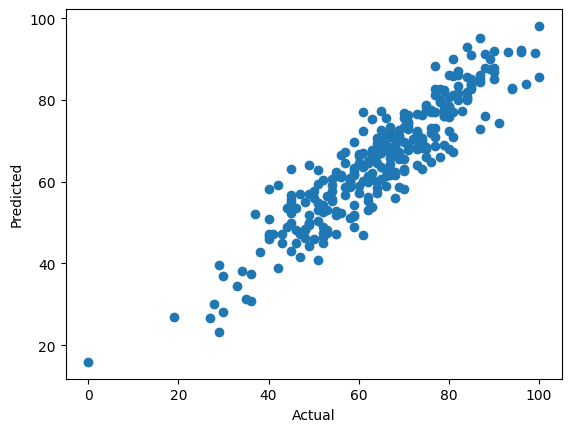

In [35]:
plt.scatter(y_test,y_pred_rf);
plt.xlabel('Actual');
plt.ylabel('Predicted');

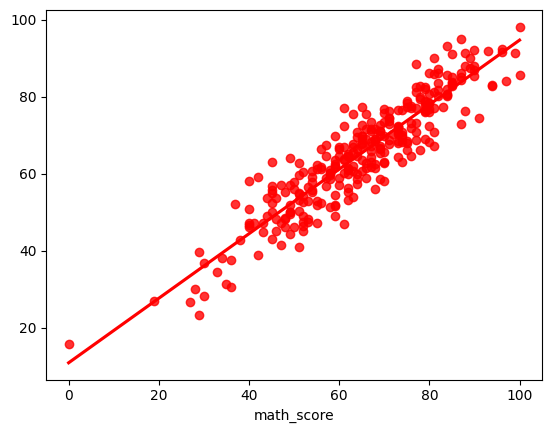

In [36]:
sns.regplot(x=y_test,y=y_pred_rf,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [37]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_rf,'Difference':y_test-y_pred_rf})
pred_df

,Actual Value,Predicted Value,Difference
521,91,74.35,16.65
737,53,56.50,-3.50
740,80,75.94,4.06
660,74,76.43,-2.43
411,84,80.38,3.62
...,...,...,...
468,77,70.91,6.09
935,70,62.71,7.29
428,65,60.62,4.38
7,40,46.03,-6.03
